### Machine Learning 
+ Supervised ML with Iris Dataset

In [1]:
# EDA packages
import pandas as pd
import numpy as np

In [2]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ML Packages

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression



#### EDA Descriptive

In [4]:
# load our dataset
df = pd.read_csv("iris.csv")

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# Check for missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
df.shape

(150, 5)

In [19]:
# Species distribution
print(df['species'].value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


### Data Visualization
+ Understand each attribute
+ Understand relationship between each

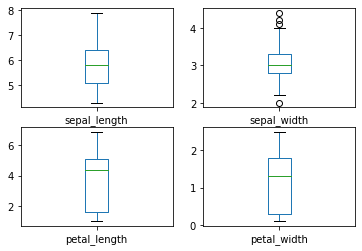

In [20]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

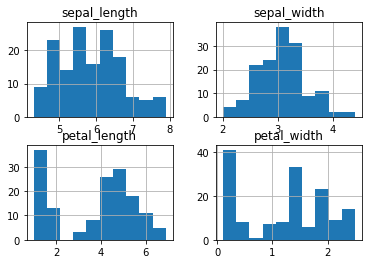

In [21]:
# histograms using pandas plot
df.hist()
plt.show()

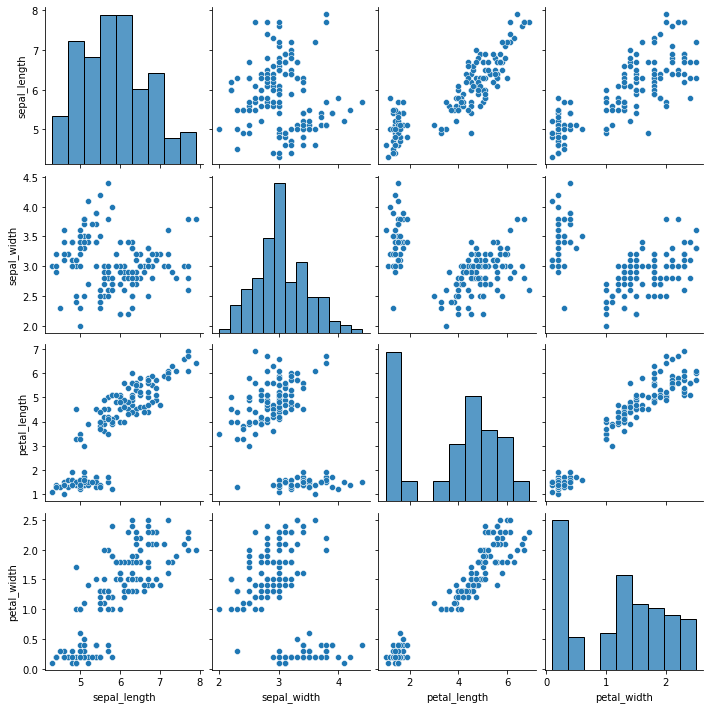

In [22]:
# Multivariate Plots
# Relationships between each attribute
sns.pairplot(df)

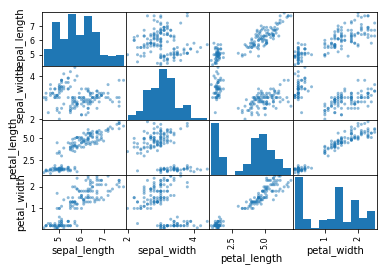

In [23]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [24]:
### ML 

In [25]:
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]


### Train Test Split

In [26]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [27]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [28]:
logit.fit(X_train,Y_train)

C:\Users\Saswat swain\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [29]:
print("accuracy :" , logit.score(X_validation,Y_validation))

accuracy : 0.8666666666666667


In [36]:
logit.predict(X_validation)

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [37]:
# Individual Prediction
mysample = np.array([4.9,3.0,1.4,0.2])
ex1 = mysample.reshape(1,-1)
print(ex1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

[[4.9 3.  1.4 0.2]]


In [38]:
logit.predict(ex1)

array(['setosa'], dtype=object)

### Saving or Persisting Our Model
+ Pickle 
+ Joblib

In [39]:
import pickle
file=open('logit_model_iris.pkl','wb+')
pickle.dump(logit,file) 

In [40]:
### Get the Models for the other ML Algorithms

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [42]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC() 

In [46]:
# Fit the model
knn.fit(X_train, Y_train)
print("accuracy :" , knn.score(X_validation,Y_validation))

accuracy : 0.9


In [47]:
# save the model to disk
file=open('knn_model_iris.pkl','wb+')
pickle.dump(knn,file) 

In [50]:
dtree.fit(X_train, Y_train)
print("accuracy :" , dtree.score(X_validation,Y_validation))

accuracy : 0.9


In [51]:
# save the model to disk
file=open('dtree_model_iris.pkl','wb+')
pickle.dump(dtree,file) 

In [55]:
svm.fit(X_train, Y_train)
print("accuracy :" , svm.score(X_validation,Y_validation))

accuracy : 0.8666666666666667


In [57]:
# save the model to disk
file=open('svm_model_iris.pkl','wb+')
pickle.dump(svm,file) 